## Criminal Detection using Machine Learning

Decison tree --- study purpose

Importing all the important machine learning libraries

In [0]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/Predicting-Criminals-master/criminal_train.csv')

Now we will look at the correlation of each feature with the target feature to find out whether they are related or not

In [12]:
data[data.columns[0:]].corr()['Criminal'][:-1]

PERID      -0.000396
IFATHER    -0.049935
NRCH17_2   -0.091212
IRHHSIZ2   -0.068281
IIHHSIZ2    0.009238
              ...   
MAIIN102    0.002309
AIIND102    0.001484
ANALWT_C    0.020863
VESTR       0.002355
VEREP      -0.007738
Name: Criminal, Length: 71, dtype: float64

Choosing the right features for the classification

## 2. Data Loading and Description

Courts are based on the principle that says "__it is better 100 guilty Persons should escape than that one innocent Person should suffer__". You are given a dataset containing answers to various questions concerning the professional and private lives of several people. A few of them have been arrested for various small and large crimes in the past. Use the given data to make a model for the court to predict if the convict is guilty or not.
![image.png](attachment:image.png)
- __False positive__ - model predict a convict to be guilty but actually he isnt. 
- __False negative__ - model predict a convict to be innocent but the person would be guilty.

So, based on the principle of court, __false positives minimisation__ is the main aim.
The dataset consists of __45718 rows__.<br/>
Below is a table having brief description of features present in the dataset.



|Feature    |	Description                                               |
|-----------| ------------                                                | 
|PERID	    |        Person ID                                            |
| IFATHER   | 	FATHER IN HOUSEHOLD                                       |
| NRCH17_2  | 	RECODED # R's CHILDREN &lt; 18 IN HOUSEHOLD               |
| RHHSIZ2	| RECODE - IMPUTATION-REVISED # PERSONS IN HH                 |
| IIHHSIZ2	| IMPUTATION INDICATOR                                        |
| IRKI17_2	| IMPUTATION-REVISED # KIDS AGED&lt;18 IN HH                  |   
| IIKI17_2  |  IRKI17_2-IMPUTATION INDICATOR                              | 
| IRHH65_2  | 	REC - IMPUTATION-REVISED # OF PER IN HH AGED&gt;=65       |
| IIHH65_2  | 	IRHH65_2-IMPUTATION INDICATOR                             |
| PRXRETRY	| SELECTED PROXY UNAVAILABLE, OTHER PROXY AVAILABLE?          | 
| PRXYDATA	| IS PROXY ANSWERING INSURANCE/INCOME QS                      |
| MEDICARE	| COVERED BY MEDICARE                                         |
| CAIDCHIP	| COVERED BY MEDICAID/CHIP                                    |
| CHAMPUS	| COV BY TRICARE, CHAMPUS, CHAMPVA, VA, MILITARY              |
| PRVHLTIN	| COVERED BY PRIVATE INSURANCE                                |
| GRPHLTIN	| PRIVATE PLAN OFFERED THROUGH EMPLOYER OR UNION              |
| HLTINNOS	| COVERED BY HEALTH INSUR                                     |
| HLCNOTYR  | ANYTIME DID NOT HAVE HEALTH INS/COVER PAST 12 MOS           |
| HLCNOTMO  | 	PAST 12 MOS, HOW MANY MOS W/O COVERAGE                    |
| HLCLAST	| TIME SINCE LAST HAD HEALTH CARE COVERAGE                    |
| HLLOSRSN	| MAIN REASON STOPPED COVERED BY HEALTH INSURANCE             |
| HLNVCOST  | 	COST TOO HIGH                                             |
| HLNVOFFR	| EMPLOYER DOESN'T OFFER                                      |
| HLNVREF	| INSURANCE COMPANY REFUSED COVERAGE                          |
| HLNVNEED  | 	DON'T NEED IT                                             |
| HLNVSOR   | 	NEVER HAD HLTH INS SOME OTHER REASON                      |
| IRMCDCHP  | 	IMPUTATION REVISED CAIDCHIP                               |
| IIMCDCHP	| MEDICAID/CHIP - IMPUTATION INDICATOR                        |
| IRMEDICR	| MEDICARE - IMPUTATION REVISED                               |
| IIMEDICR	| MEDICARE - IMPUTATION INDICATOR                             |
| IRCHMPUS	| CHAMPUS - IMPUTATION REVISED                                |
| IICHMPUS	| CHAMPUS - IMPUTATION INDICATOR                              |
| IRPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION REVISED               |
| IIPRVHLT	| PRIVATE HEALTH INSURANCE - IMPUTATION INDICATOR             |
| IROTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION REVISED                 |
| IIOTHHLT	| OTHER HEALTH INSURANCE - IMPUTATION INDICATOR               |
| HLCALLFG	| FLAG IF EVERY FORM OF HEALTH INS REPORTED                   |
| HLCALL99	| YES TO MEDICARE/MEDICAID/CHAMPUS/PRVHLTIN                   |
| ANYHLTI2	| COVERED BY ANY HEALTH INSURANCE - RECODE                    |
| IRINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION REVISED            |
| IIINSUR4	| RC-OVERALL HEALTH INSURANCE - IMPUTATION INDICATOR          |
| OTHINS	| RC-OTHER HEALTH INSURANCE                                   |
| CELLNOTCL	| NOT A CELL PHONE                                            |
| CELLWRKNG | WORKING CELL PHONE                                          |
| IRFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION REVISED          |
| IIFAMSOC	| FAM RECEIVE SS OR RR PAYMENTS - IMPUTATION INDICATOR        |
| IRFAMSSI	| FAM RECEIVE SSI - IMPUTATION REVISED                        |
| IIFAMSSI	| FAM RECEIVE SSI - IMPUTATION INDICATOR                      |
| IRFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION REVISED       |
| IIFSTAMP	| RESP/OTH FAM MEM REC FOOD STAMPS - IMPUTATION INDICATOR     |
| IRFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION REVISED              |
| IIFAMPMT	| FAM RECEIVE PUBLIC ASSIST - IMPUTATION INDICATOR            |
| IRFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION REVISED       |
| IIFAMSVC	| FAM REC WELFARE/JOB PL/CHILDCARE - IMPUTATION INDICATOR     |
| IRWELMOS	| IMP. REVISED - NO.OF MONTHS ON WELFARE                      |
| IIWELMOS	| NO OF MONTHS ON WELFARE - IMPUTATION INDICATOR              |
| IRPINC3	| RESP TOT INCOME (FINER CAT) - IMP REV                       |
| IRFAMIN3  | RECODE - IMP.REVISED - TOT FAM INCOME                       |
| IIPINC3	| RESP TOT INCOME (FINER CAT) - IMP INDIC                     |
| IIFAMIN3	| IRFAMIN3 - IMPUTATION INDICATOR                             |
| GOVTPROG  | RC-PARTICIPATED IN ONE OR MORE GOVT ASSIST PROGRAMS         |
| POVERTY3	| RC-POVERTY LEVEL                                            |
| TOOLONG	| RESP SAID INTERVIEW WAS TOO LONG                            |
| TROUBUND	| DID RESP HAVE TROUBLE UNDERSTANDING INTERVIEW               |
| PDEN10	| POPULATION DENSITY 2010                                     |
| COUTYP2	| COUNTY METRO/NONMETRO STATUS                                |
| MAIIN102	| MAJORITY AMER INDIAN AREA INDICATOR FOR SEGMENT             |
| AIIND102	| AMER INDIAN AREA INDICATOR                                  |
| ANALWT_C	| FIN PRSN-LEVEL SIMPLE WGHT                                  |
| VESTR    	| ANALYSIS STRATUM                                            |
| VEREP	    | ANALYSIS REPLICATE                                          |
| Criminal	| Target Variable                                             |

In [13]:
data.columns

Index(['PERID', 'IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IIHHSIZ2', 'IRKI17_2',
       'IIKI17_2', 'IRHH65_2', 'IIHH65_2', 'PRXRETRY', 'PRXYDATA', 'MEDICARE',
       'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN', 'HLTINNOS', 'HLCNOTYR',
       'HLCNOTMO', 'HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF',
       'HLNVNEED', 'HLNVSOR', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR',
       'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'IIOTHHLT',
       'HLCALLFG', 'HLCALL99', 'ANYHLTI2', 'IRINSUR4', 'IIINSUR4', 'OTHINS',
       'CELLNOTCL', 'CELLWRKNG', 'IRFAMSOC', 'IIFAMSOC', 'IRFAMSSI',
       'IIFAMSSI', 'IRFSTAMP', 'IIFSTAMP', 'IRFAMPMT', 'IIFAMPMT', 'IRFAMSVC',
       'IIFAMSVC', 'IRWELMOS', 'IIWELMOS', 'IRPINC3', 'IRFAMIN3', 'IIPINC3',
       'IIFAMIN3', 'GOVTPROG', 'POVERTY3', 'TOOLONG', 'TROUBUND', 'PDEN10',
       'COUTYP2', 'MAIIN102', 'AIIND102', 'ANALWT_C', 'VESTR', 'VEREP',
       'Criminal'],
      dtype='object')

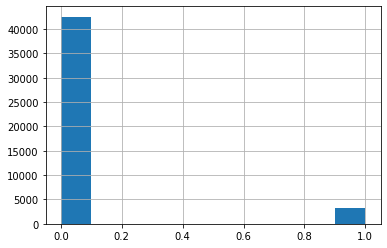

In [19]:
# understanding the data for prediction

data.Criminal.hist()

In [0]:
criminal_features=['IFATHER', 'NRCH17_2', 'IRHHSIZ2', 'IRKI17_2',
        'IRHH65_2',   'PRXYDATA', 'MEDICARE',
       'CAIDCHIP', 'CHAMPUS', 'PRVHLTIN', 'GRPHLTIN', 'HLTINNOS', 'HLCNOTYR',
       'HLCNOTMO', 'HLCLAST', 'HLLOSRSN', 'HLNVCOST', 'HLNVOFFR', 'HLNVREF',
       'HLNVNEED', 'HLNVSOR', 'IRMCDCHP', 'IIMCDCHP', 'IRMEDICR', 'IIMEDICR',
       'IRCHMPUS', 'IICHMPUS', 'IRPRVHLT', 'IIPRVHLT', 'IROTHHLT', 'IIOTHHLT',
       'HLCALLFG', 'HLCALL99', 'ANYHLTI2', 'IRINSUR4', 'IIINSUR4', 'OTHINS',
        'CELLWRKNG','IIFAMSOC', 
       'IIFAMSSI',  'IIFSTAMP',  'IIFAMPMT', 
       'IIFAMSVC',  'IRPINC3', 'IRFAMIN3', 'IIPINC3',
       'IIFAMIN3', 'POVERTY3',  'PDEN10',
       'COUTYP2',  'ANALWT_C']

In [0]:
X_train = data[criminal_features].copy() #Creating the X_training data for training the classifier

In [0]:
y_train=data[['Criminal']] #Creating the y_train data for training the classifier 

In [50]:
# Decision tree classigier and taking max_leaf_node to be 10

criminal_classifier = DecisionTreeClassifier(max_leaf_nodes = 15, random_state  = 0)
criminal_classifier.fit(X_train, y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
# Test data for testing the classifier
data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/Predicting-Criminals-master/criminal_test.csv')

In [0]:
# X_test for testing the decision tree

X_test = data1[criminal_features].copy()

In [0]:
# predicting the outcomes

predicitons = criminal_classifier.predict(X_test)

In [0]:
my_submission = pd.DataFrame({'PERID': data1.PERID, 'Criminal': predicitons})
# you could use any filename. We choose submission here
FILE1=my_submission[['PERID','Criminal']]
FILE1.to_csv('/content/drive/My Drive/Colab Notebooks/Project/Predicting-Criminals-master/FILE1.csv', index=False)


- Thank you 
- Bimal P Baby
- bimalpbaby007@gmail.com